In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
import wfdb

In [2]:
# path of data generated by diffusion model
paths = 'samples/ECG-DDM/ch_174/*'

In [3]:
channel_details = []
for path in glob(paths):
    tmp = {}
    data = np.loadtxt(path)
    for ch in range(8):
        if ch==0:
            if np.max(data[ch][1500:3000])> np.abs(np.min(data[ch][1500:3000])):
                tt = np.argmax(data[ch][1500:3000])
            else:
                tt = np.argmin(data[ch][1500:3000])
        tmp[f'ch_{ch}_peak']= data[ch][tt-200+1500:tt+200+1500]
        
    tmp['y']=list(range(400))

    channel_details.append(pd.DataFrame(tmp))
df_fake = pd.concat(channel_details)
# df_fake['type'] = 'ECG-DDM'
# df_fake

In [4]:
df_fake['type'] = 'ECG-DDM'
df_fake

,ch_0_peak,ch_1_peak,ch_2_peak,ch_3_peak,ch_4_peak,ch_5_peak,ch_6_peak,ch_7_peak,y,type
0,-0.009997,-0.004661,0.005336,0.007329,-0.007667,0.000338,0.008467,-0.016704,0,ECG-DDM
1,-0.010021,-0.003230,0.006792,0.006626,-0.008406,0.001781,-0.001348,-0.018032,1,ECG-DDM
2,-0.013743,-0.004266,0.009477,0.009005,-0.011610,0.002606,0.007955,-0.021270,2,ECG-DDM
3,-0.016923,-0.003355,0.013568,0.010139,-0.015246,0.005107,0.004829,-0.017782,3,ECG-DDM
4,-0.019863,-0.004168,0.015695,0.012016,-0.017779,0.005763,0.005067,-0.010543,4,ECG-DDM
...,...,...,...,...,...,...,...,...,...,...
395,0.008970,0.034958,0.025989,-0.021964,-0.008509,0.030474,0.003246,0.038255,395,ECG-DDM
396,-0.000700,-0.006279,-0.005578,0.003490,0.002439,-0.005929,0.005599,0.035813,396,ECG-DDM
397,-0.014647,0.007725,0.022372,0.003461,-0.018509,0.015048,-0.008936,0.020954,397,ECG-DDM
398,-0.013431,0.013357,0.026788,0.000037,-0.020109,0.020073,0.006594,0.046675,398,ECG-DDM


In [5]:
# real data
base = '/dataset/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/'
fname = 'ptbxl_database.csv'
ptbxl = pd.read_csv(base+fname)
ptbxl

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21832,21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21833,21834,20703.0,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21834,21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr
21835,21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,...,True,NaN,NaN,NaN,NaN,SVES,NaN,8,records100/21000/21836_lr,records500/21000/21836_hr


In [6]:
channel_details = []
for i in range(len(ptbxl)):
    filename = ptbxl.iloc[i, -1]
    data =  wfdb.rdsamp(base + filename, channel_names=['I','II','V1','V2','V3','V4','V5','V6'])[0].T
    tmp = {}
    for ch in range(8):
        if ch==0:
            if np.max(data[ch][1500:3000])> np.abs(np.min(data[ch][1500:3000])):
                tt = np.argmax(data[ch][1500:3000])
            else:
                tt = np.argmin(data[ch][1500:3000])
        tmp[f'ch_{ch}_peak']= data[ch][tt-200+1500:tt+200+1500]
        
    tmp['y']=list(range(400))

    channel_details.append(pd.DataFrame(tmp))
df_real = pd.concat(channel_details)

In [7]:
df_real['type'] ='real'

In [8]:
# gan data
gan = 'samples/AdvP2P-AutoEmb/ch_2500/*'

In [9]:
channel_details = []
for path in glob(gan):
    tmp = {}
    data = np.loadtxt(path)
    for ch in range(8):
        if ch==0:
            if np.max(data[ch][1500:3000])> np.abs(np.min(data[ch][1500:3000])):
                tt = np.argmax(data[ch][1500:3000])
            else:
                tt = np.argmin(data[ch][1500:3000])
        tmp[f'ch_{ch}_peak']= data[ch][tt-200+1500:tt+200+1500]
        
    tmp['y']=list(range(400))

    channel_details.append(pd.DataFrame(tmp))
df_gan = pd.concat(channel_details)

In [10]:
df_gan['type'] = 'AdvP2P-AutoEmb'

In [11]:
df_both = pd.concat([df_fake, df_real, df_gan])

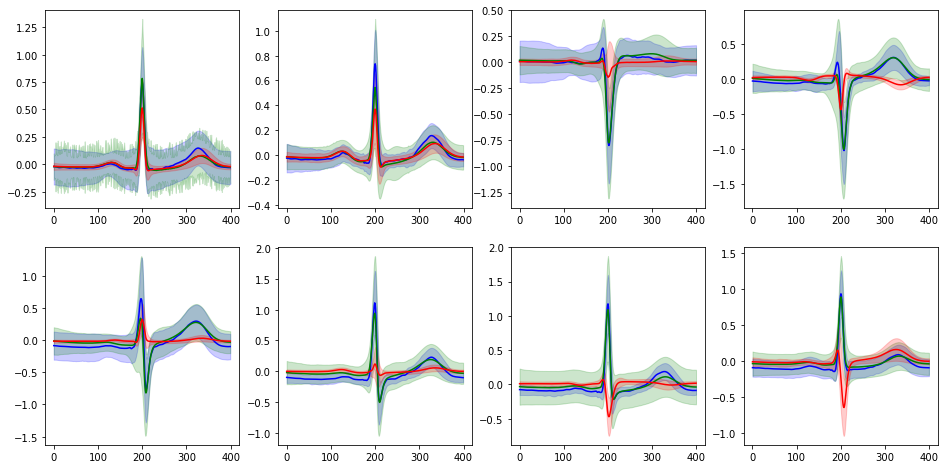

In [12]:
plt.figure(figsize=(16, 8))
for ch in range(8):
    plt.subplot(2,4,ch+1)
    sns.lineplot(x='y', y=f'ch_{ch}_peak', data=df_both.query('type=="AdvP2P-AutoEmb"'), errorbar='sd', color='b')
    sns.lineplot(x='y', y=f'ch_{ch}_peak', data=df_both.query('type=="real"'), errorbar='sd', color='g')
    sns.lineplot(x='y', y=f'ch_{ch}_peak', data=df_both.query('type=="ECG-DDM"'), errorbar='sd', color='r')
    plt.xlabel('')
    plt.ylabel('')
plt.savefig('peak_b:gan_g:rea_r:dif2.jpeg')